In [1]:
using Plots,DifferentialEquations,LaTeXStrings
default(label="",dpi=400,linewidth=2,size=(560,350))

# Qualitative methods

Exact solutions of ODEs are few and far-between. There are a number of tools that can be used to gain insight about an ODE without knowing or producing a solution. These are grouped together under the name of **qualitative methods**.

## Direction field

In the scalar equation $x'=f(t,x)$, $f$ gives the slope of any solution at any point in the $(t,x)$ plane. Hence, while it is usually not trivial to draw curves for the solutions, it is straightforward to draw the instantaneous slopes of them. Here is a basic Julia function for it.

In [2]:
function dirfield(f,tlims,xlims)
    t = range(tlims...,length=16)
    x = range(xlims...,length=16)
    T = vec([t for t in t, x in x])
    X = vec([x for t in t, x in x])
    F = f.(T,X)

    avg = sum( @. sqrt(F^2+1) ) / length(F)
    scale = 0.05*max(tlims[2]-tlims[1],xlims[2]-xlims[1])/avg
    quiver( T,X,quiver=(ones(size(F))*scale,F*scale) )
end 

dirfield (generic function with 1 method)

For instance, the *logistic equation* $x'=ax-bx^2$ can be visualized for $a=3$, $b=2$ via

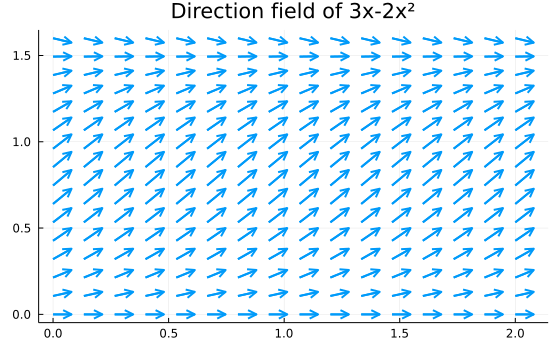

In [3]:
f(t,x) = 3x-2x^2
dirfield(f,[0,2],[0,1.6])
title!("Direction field of 3x-2x²")

```{index} autonomous equation
```

Since this equation is autonomous, the picture above is the same along every vertical line. 

Here is a direction field for $x'=t-x^2$. Note that the arrows are horizontal along the sideways parabola $t=x^2$, because that is where the slope is zero.

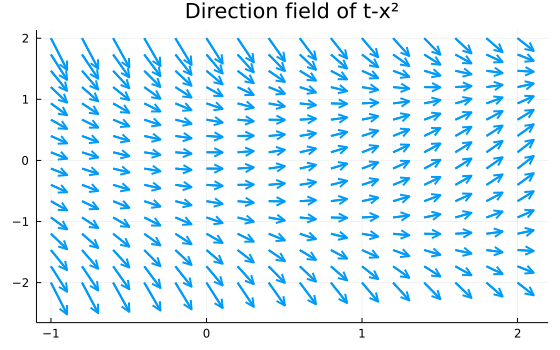

In [4]:
f(t,x) = t-x^2
dirfield(f,[-1,2],[-2,2])
title!("Direction field of t-x²")

## Autonomous equations

An autonomous first-order ODE is of the form $x'=f(x)$. The term means that the problem doesn't depend on any external factors; it is entirely self-contained.

:::{index} steady state
:::
:::{index} equilibrium
:::

A value $\hat{x}$ that satisfies $f(\hat{x})=0$ clearly makes the constant function $x(t)\equiv \hat{x}$ a solution. 

:::{proof:definition} Steady state / Equilibrium
For the autonomous ODE $x'=f(x)$, any value $\hat{x}$ that is a root of $f$ is called a **steady state**,  **equilibrium value**, **fixed point**, or **critical point**. 
:::

:::{index} stability
:::

One of the most important characteristics of each steady state is its **stability**. Let $x(t,X)$ be the solution of the initial-value problem

$$
\frac{d x}{d t}=f(x), \quad x(0)=X.
$$

::::{proof:definition} Asymptotic stability
The steady state $\hat{x}$ is said to be **asymptotically stable** if there is a positive number $\delta$ such that 

$$
\lim_{t\to\infty} x(t,X) = \hat{x}
$$

whenever $|X-\hat{x}|< \delta$. 
::::

In words, asymptotic stability means that if you start close enough to $\hat{x}$, then you end up there as $t \to \infty$. There is a weaker form of the property that is a bit more difficult to parse.

::::{proof:definition} Stability
The steady state $\hat{x}$ is said to be {term}`stable` if, for any $\epsilon>0$, you can ensure that $|x(t,X)-\hat{x}|<\epsilon$ for all time whenever $|X-\hat{x}|<\delta$, where $\delta$ depends on $\epsilon$. If there is no such way to choose $\delta$, then $\hat{x}$ is **unstable**.
::::

:::{index} phase line diagram
:::
One tool for discriminating between stable and unstable equilibria is a **phase diagram**. 

::::{proof:example} 

Consider the ODE $x'=x-x^3$. We will start by graphing $f(x)=x-x^3$.

![PL diagram 1](pldiag1.svg)

The equilibrium solutions occur at the crossings of the $x$-axis in the plot, where $dx/dt=0$. 

![PL diagram 2](pldiag2.svg)

Now we highlight those parts of the plot where the graph is above the $x$-axis, i.e., where $dx/dt > 0$. 

![PL diagram 3](pldiag3.svg)

Imagine that the solution is represented by a point $x(t)$ sliding along the $x$-axis. Under the highlighted regions, this point has to be sliding rightward, because $x'>0$ there.

![PL diagram 4](pldiag4.svg)

Similarly, on the remaining segments of the $x$-axis, the solution must be sliding leftward. 

![PL diagram 5](pldiag5.svg)

Graphically it is now clear that the steady states at $x=\pm 1$ are stable, while the one at $x=0$ is unstable.
::::

A simple analytical test for stability is:

- If $f'(\hat{x})<0$, then $\hat{x}$ is asymptotically stable.
- If $f'(\hat{x})>0$, then $\hat{x}$ is unstable.

As you might surmise, the case $f'(\hat{x})=0$ is ambiguous, and another analysis is needed to reveal the stability.